# Laplace's Equation

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

### Initialize Variables

In [124]:
a = 5
b = 5
c = 5
h = 0.1
tolerance = 0.01

ContourLevels = 50
ProgressUpdateSkip = 150

alpha = 1.5  # Over-relaxation parameter

In [112]:
x_start = 0
x_stop = a

y_start = 0
y_stop = b

z_start = 0
z_stop = c

### Determine the number of bins

In [113]:
Nx = int((x_stop-x_start)/h + 1)
Ny = int((y_stop-y_start)/h + 1)
Nz = int((z_stop - z_start)/h + 1)
print('This will simulate from x = %d to %d distance units with a spacing of %0.4f units.' % (x_start, x_stop, h))
print('This will simulate from y = %d to %d distance units with a spacing of %0.4f units.' % (y_start, y_stop, h))
print('This will require %d by %d by %d bins (including 0).' % (Nx, Ny, Nz))

This will simulate from x = 0 to 5 distance units with a spacing of 0.1000 units.
This will simulate from y = 0 to 5 distance units with a spacing of 0.1000 units.
This will require 51 by 51 by 51 bins (including 0).


### Set up solution array

In [114]:
x, y , z = np.linspace(x_start, x_stop, Nx), np.linspace(y_start, y_stop, Ny) , np.linspace(z_start, z_stop, Nz)
xygrid = np.zeros((Nx, Ny))
xzgrid = np.zeros((Nx, Nz))
yzgrid = np.zeros((Ny, Nz))
xyzgrid = np.zeros((Nx, Ny, Nz))

### Scenario:  Bottom row is V = 0, Top row is V = 100 V

In [115]:
xyzgrid[:,0,:] = 100
xyzgrid[:,Ny-1,:] = 100
#xyzgrid[:][20]

In [116]:
MaxDiff = 100

Count = 0
MaxCount = 1040000

print('Beginning to find the solution...')
while(MaxDiff > tolerance and Count < MaxCount):
    Count += 1
    if(Count % ProgressUpdateSkip == 0):
        print('Currently on iteration %d (Max Difference: %0.4f)...' % (Count, MaxDiff))
    old_xyzgrid = np.copy(xyzgrid)
    for i in range(1, Nx-1):
        for j in range(1,Ny-1):
            for k in range(1, Nz-1):
                CurrentPoint = xyzgrid[i, j, k]
               # ModifiedPoint = 1/4*(xygrid[i-1,j]+xygrid[i+1,j]+xygrid[i,j-1]+xygrid[i,j+1])
                ModifiedPoint = 1/6*(xyzgrid[i-1,j,k]+xyzgrid[i+1,j,k]+xyzgrid[i,j-1,k]+xyzgrid[i,j+1,k] +xyzgrid[i,j,k-1] +xyzgrid[i,j,k+1] )
                xyzgrid[i, j, k] = CurrentPoint + alpha*(ModifiedPoint - CurrentPoint)
    MaxDiff = np.max(np.abs(xyzgrid-old_xyzgrid))
    
print('Finished at iteration %d with a maximum change of %0.4f.' % (Count, MaxDiff))


Beginning to find the solution...
Currently on iteration 10 (Max Difference: 3.4912)...
Currently on iteration 20 (Max Difference: 1.5165)...
Currently on iteration 30 (Max Difference: 0.9563)...
Currently on iteration 40 (Max Difference: 0.6948)...
Currently on iteration 50 (Max Difference: 0.5389)...
Currently on iteration 60 (Max Difference: 0.4354)...
Currently on iteration 70 (Max Difference: 0.3625)...
Currently on iteration 80 (Max Difference: 0.3100)...
Currently on iteration 90 (Max Difference: 0.2701)...
Currently on iteration 100 (Max Difference: 0.2392)...
Currently on iteration 110 (Max Difference: 0.2137)...
Currently on iteration 120 (Max Difference: 0.1920)...
Currently on iteration 130 (Max Difference: 0.1725)...
Currently on iteration 140 (Max Difference: 0.1548)...
Currently on iteration 150 (Max Difference: 0.1387)...
Currently on iteration 160 (Max Difference: 0.1240)...
Currently on iteration 170 (Max Difference: 0.1108)...
Currently on iteration 180 (Max Differen

### Caclulating the electric field 

In [160]:
dvdx, dvdy,dvdz = np.zeros((Nx,Ny,Nz)), np.zeros((Nx,Ny,Nz)), np.zeros((Nx,Ny,Nz))

In [161]:
#Lets calculate dvdx!
for k in range(1,Nz-1):   
    for j in range(1,Ny-1):
        for i in range(1,Nx-1):
            dvdx[i,j,k] = (xyzgrid[i,j,k] - xyzgrid[i-1,j,k])/h
#Lets calculate dvdy!            
for k in range(1,Nz-1):   
    for i in range(1,Nx-1):            
        for j in range(1,Ny-1):
            dvdy[i,j,k] = (xyzgrid[i,j,k] - xyzgrid[i,j-1,k])/h
#Lets calculate dvdz!            
for i in range(1,Nx-1):   
    for j in range(1,Ny-1):            
        for k in range(1,Nz-1):
            dvdz[i,j,k] = (xyzgrid[i,j,k] - xyzgrid[i,j,k-1])/h

In [167]:
#CALCULATE E
#Egrad = np.gradient(xyzgrid)
for i in range(1,Nx-1):   
    for j in range(1,Ny-1):            
        for k in range(1,Nz-1):
            Egrad[i,j,k] = -dvdx[i,j,k] - dvdy[i,j,k] - dvdz[i,j,k]
#Egrad

## Modeling the magnetic field


In [370]:
numCharges = 1
m = 1.0#1.667*10**-31
q = 1.0#1.66*10**-19
dt = 0.01
t_start = 0
t_end = 100
initPosx = (100*np.random.random([numCharges])).astype(int)
initPosy = (100*np.random.random([numCharges])).astype(int)
initPosz = (100*np.random.random([numCharges])).astype(int)

initVelx = 5#(5*np.random.random([numCharges])).astype(int)
initVely = 5#(5*np.random.random([numCharges])).astype(int)
initVelz = -5#(5*np.random.random([numCharges])).astype(int)

initAccelx = (10*np.random.random([numCharges])).astype(int)
initAccely = (10*np.random.random([numCharges])).astype(int)
initAccelz = (10*np.random.random([numCharges])).astype(int)

initCharge = (10**-9*np.random.random([numCharges])).astype(int)

N = int((t_end-t_start)/dt + 1)
r, v, a, t = np.zeros((N,3)), np.zeros((N,3)),  np.zeros((N,3)), np.zeros(N)

# we could turn it into a three dimensional array, however it is simply just a 
S, B = np.zeros(N) ,np.zeros((N, 3))
B[:,1] = 50.43*10**-2

### If we launch a particle into the magnetic field, we should expect to see  spirals(Due to cyclotronic motion)
#### $$ a = \frac{d^2x}{dt^2} = \frac{qv\times B}{m} = \frac{dv}{dt}
 $$
#### $$ v = \frac{dx}{dt} $$

#### See the below code to get an idea of how I lock the position vector in our discritized box
#### Also, The below loop could be vastly improved by interpolating the value of our electric field, our assuring that the time step we use is equal to our space step

In [371]:
# count = 0
# for i in range(1,N): 
#     S[i] = i%51
#     if(S[i] == 0):
#         count += 1
#     if(count%2 == 1):
#         S[i] = 51 - i%51
#     print('    S= %d' %(S[i]) )

In [372]:

#a[0] = [initAccelx, initAccely, initAccelz]
v[0] = [initVelx, initVely, initVelz]
a[0] =  B[0][1]*(v[0][0] - v[0][2])*(q/m)
r[0] = [initPosx, initPosy, initPosz]

countx = 0
county = 0
countz = 0
Sx = 0
Sy = 0
Sz = 0

for i in range(1,N):

    a[i] = ( Egrad[Sx,Sy,Sz] + np.cross(v[i-1],B[i-1]))*q/m
    v[i] = a[i]*dt + v[i-1]
    r[i] = v[i]*dt + r[i-1]
    #Lock the positions of x betwixt 0-50
    if(int(r[i][0])%(Nx-1) == 0):
        countx += 1
    if(countx%2 == 1):
        Sx = (Nx-1) - int(r[i][1]%(Nx-1))
        
    #Lock the positions of x betwixt 0-50
    if(int(r[i][1])%(Ny-1) == 0):
        county += 1
    if(county%2 == 1):
        Sy = (Ny-1) - int(r[i][2]%(Ny-1))
        
    #Lock the positions of x betwixt 0-50    
    if(int(r[i][2])%(Nz-1) == 0):
        countz += 1
    if(countz%2 == 1):
        Sz = (Nz-1) - int(r[i][2]%(Nz-1))


#### It should be noted, that this is a TERRIBLE way to solve the problem of our position vector being much larger than our space vector. While it does allow us to broadcast our arrays, it does not model our particles path as accurately as if we were to let it happen naturally. 

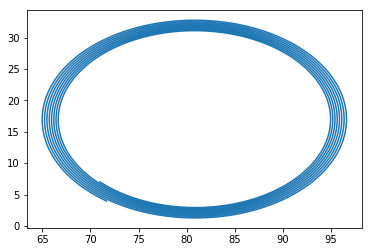

In [373]:
plt.plot(r[:,0],r[:,2])
#Plot of the position:

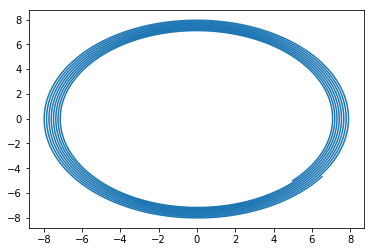

In [374]:
plt.plot(v[:,0],v[:,2])
#Plot of the velocity

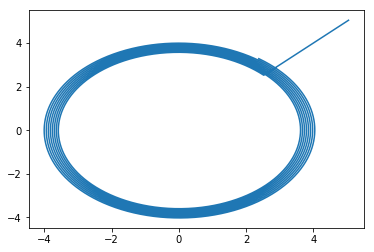

In [375]:
plt.plot(a[:,0],a[:,2])
#Plot of the acceleration: